Nama : Rizki Luthfan A


NIM  : 1301170389


Assignment CLO 3 - Visualisasi Data

# Instal sastrawi

In [2]:
!pip install Sastrawi

     |████████████████████████████████| 215kB 5.9MB/s 


In [3]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from google.colab import drive
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

import matplotlib.pyplot as plt
%matplotlib inline

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/My Drive/assignment 3 visdat/dataset-covid.csv'
df = pd.read_csv(path,index_col=0)
df

,date,time,user_id,username,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,translated
conversation_id,,,,,,,,,,,
1258425982907637761,2020-05-07,23:58:29,1058474317,monologis_id,pemerintah lampung bantuan mahasiswa derasnya ...,[],0,3,0,[],the lampung government aid the swift student d...
1258320972198940675,2020-05-07,23:57:30,1179769476,its_dul,pemerintah menerapkan herd immunity kemampuan ...,['mas__piyuuu'],0,0,0,[],"the government implements herd immunity, the c..."
1258356644427083777,2020-05-07,23:53:20,1012156669831229441,meonkbaong,lakukan makanan berbuka sahur 10 kepala keluar...,['oiivert'],0,0,0,[],do break fasting meals 10 families affected by...
1258424368993931265,2020-05-07,23:52:04,1204303690061844481,rakyatdotnews,warga positif corona bupati kondisi menuntut k...,[],0,0,0,"['#rakyatdotnews', '#referensiterkini', '#raky...",positive citizen corona regent conditions dema...
1258423545698246656,2020-05-07,23:48:48,227620381,annisathalib_,emosi banget kondisi disuruh liputan covid dos...,[],0,0,0,['#dirumahaja'],"very emotional, conditions were told to cover ..."
...,...,...,...,...,...,...,...,...,...,...,...
1284921932069007362,2020-07-20,01:55:46,866077104944816129,btrxangl,hoaks hoaks beredar covid pemerintah mengendal...,[],1,0,0,[],hoaks hoaks circulating covid the government c...
1284918970806611969,2020-07-20,01:32:09,1040494422608101376,monitordaycom,tingginya covid 19 majelis permusyawaratan rak...,['monitordaycom'],0,2,2,"['#monitorday', '#kopipahit']",the high covid of 19 assemblies of the people ...
1284918641520070656,2020-07-20,01:30:51,997745867548377088,gemaadityaer,pakai masker cuci hand sanitizer namanya idiot...,[],0,0,0,[],"wearing hand sanitizer wash mask, the name of ..."


In [5]:
df.index = [x for x in range(0, len(df.values))]
df.head(10)

,date,time,user_id,username,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,translated
0,2020-05-07,23:58:29,1058474317,monologis_id,pemerintah lampung bantuan mahasiswa derasnya ...,[],0,3,0,[],the lampung government aid the swift student d...
1,2020-05-07,23:57:30,1179769476,its_dul,pemerintah menerapkan herd immunity kemampuan ...,['mas__piyuuu'],0,0,0,[],"the government implements herd immunity, the c..."
2,2020-05-07,23:53:20,1012156669831229441,meonkbaong,lakukan makanan berbuka sahur 10 kepala keluar...,['oiivert'],0,0,0,[],do break fasting meals 10 families affected by...
3,2020-05-07,23:52:04,1204303690061844481,rakyatdotnews,warga positif corona bupati kondisi menuntut k...,[],0,0,0,"['#rakyatdotnews', '#referensiterkini', '#raky...",positive citizen corona regent conditions dema...
4,2020-05-07,23:48:48,227620381,annisathalib_,emosi banget kondisi disuruh liputan covid dos...,[],0,0,0,['#dirumahaja'],"very emotional, conditions were told to cover ..."
5,2020-05-07,23:47:53,1125872220352311297,prosesnewsid,antisipa penyebaran pandemi covid 19 membutuhk...,[],0,0,0,"['#prosesnewsid', '#psbb', '#gorontalo']",anticipation of the spread of the pandemic 19 ...
6,2020-05-07,23:44:33,1257394105992142849,midhopaulo14,bang pemerintah peduli republik rakyat cina ur...,['haris_azhar'],0,0,1,[],bang the government cares about the people's r...
7,2020-05-07,23:41:44,721909350705397760,kpu_magetan,updates terkini covid 19 kamis 07 05 2020 sumb...,[],0,0,3,['#kpulawancovid19'],covid latest updates 19 thursday 07 05 2020 so...
8,2020-05-07,23:39:01,1224962501416112128,bangaceng88,pie menteri keuangan sri mulyani pemerintah pr...,[],0,1,3,['#skandalamiespemprovdki'],pie finance minister sri mulyani provincial go...
9,2020-05-07,23:37:32,1113617506327883778,kasehsaulmouk,bilang beruntung ribuan warga mati terdaftar k...,['geloraco'],0,2,13,[],say lucky thousands of dead registered covid v...


<h3>Combining all tweets into text variable</h3>

In [6]:
text = " ".join(review for review in df.tweet)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 5479288 words in the combination of all review.


<h3>Getting Indonesian stopwords list from Sastrawi library</h3>

In [7]:
stop_factory = StopWordRemoverFactory().get_stop_words()
more_stopword = ['covid', 'pemerintah', 'indonesia','nya']
 
stopwords_indonesia = stop_factory + more_stopword

Masukan Gambar

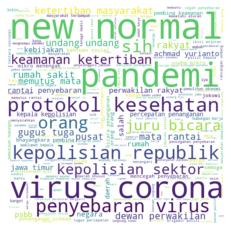

In [8]:
wc = WordCloud(stopwords=stopwords_indonesia, background_color="white", 
               max_words=600, max_font_size=256, random_state=42,
               width=500, height=500)
wc.generate(text)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

<h3>Plot with  Flag as the model</h3>

disini akan digunakan bendera korea


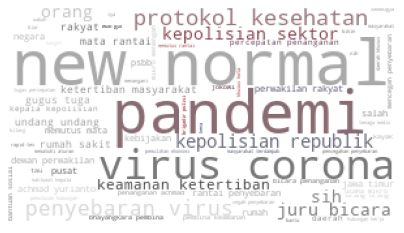

In [10]:
# Generate a word cloud image
mask = np.array(Image.open("korea.jpeg"))
wordcloud_id = WordCloud(stopwords=stopwords_indonesia, background_color="white", 
                         max_font_size=256,random_state=42,mode="RGBA", max_words=600, mask=mask).generate(text)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_id.recolor(color_func=image_colors))
plt.axis("off")

# store to file
plt.savefig("hasil.png", format="png")

plt.show()